In [190]:
#linear regression 

#import functions needed to set up the dataset
from prepare_data import create_testdata
from preprocessing import preprocessing

#import functions specific to this model
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

#create datasets
df=preprocessing()
features_train,windspeed_train,features_test,windspeed_test=create_testdata(df,'50')
#seperate out the one-hot encoding variables before standardization 
df1 = features_train.iloc[:, :17]
df2 = features_train.iloc[:, 17:]
df3 = features_test.iloc[:, :17]
df4 = features_test.iloc[:, 17:]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
dftrain=scaler.transform(df1)
dftest=scaler.transform(df3)

df1=pd.DataFrame(data=dftrain,index=df1.index.values,columns=df1.columns.values)
df3=pd.DataFrame(data=dftest,index=df3.index.values,columns=df3.columns.values)

features_train=pd.concat([df1,df2], axis=1)
features_test=pd.concat([df3,df4], axis=1)

kfold=10 #default 10-fold cross validation

#hard to impute by country mean so compromise is to have an overall mean strategy
lm = linear_model.LinearRegression()

cv = KFold(n_splits=kfold, shuffle=True, random_state=1)

nested_score = cross_val_score(lm, features_train, windspeed_train, scoring='neg_mean_squared_error',cv=cv)

#estimated training error
print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))

lm.fit(features_train,windspeed_train)

print(lm.coef_)
#now predict the windspeed for test set and output final error (mse)

y_predict=lm.predict(features_test)
print([windspeed_test,y_predict])
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

#feature importance 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lm, random_state=1).fit(features_test, windspeed_test)
explaination=eli5.explain_weights_df(perm, feature_names = features_test.columns.tolist(),top=10)
print(explaination)




Model is estimated to have generalisation error of -0.6603388052083325 with standard deviation 0.019162088853815165.
[ -0.1035795    0.32515385  -0.03787454  -0.10135944  -0.24017357
  -0.02503429  -0.11624032   0.10589626   0.02620407  -0.06959645
  -0.07721797   0.03368742  -0.13828934   0.41640669   0.12237591
  -2.57559356  -1.96508454   2.49785301   1.58465111  -0.73026813
  -0.22356805   2.93369951 -10.36964043   1.49997153   2.80730144]
[array([ 5.32469,  8.79064,  5.5219 ,  5.33286,  6.25302,  7.34213,
        5.94832,  5.44313,  5.17981,  6.99409, 10.34596,  5.4875 ,
        5.74683,  5.48484,  5.24081,  5.54112,  5.7455 ,  5.65276,
        5.50914,  5.59056,  5.19619,  5.68234,  6.04755,  5.44435,
        5.63347,  5.27753,  5.65043,  5.58674,  6.41796,  5.76506,
        5.33724,  6.24089,  5.49529,  5.62311,  5.63724,  6.09649,
        5.34993,  7.67894,  5.40651,  5.50076,  5.65101,  5.53381,
        5.85302,  4.84647,  5.514  ,  6.3933 ,  5.54447,  5.37501,
        5.3981 

                                 feature    weight       std
0                                    Lat  7.948679  0.071108
1                                   Long  4.671630  0.105632
2                           South Africa  3.144236  0.065273
3                                 France  0.730134  0.013891
4                                  India  0.702150  0.028403
5                                 Turkey  0.425303  0.022988
6                               Scotland  0.361878  0.009380
7         Elevation of Turbines (meters)  0.187205  0.012319
8  Distance to the closest Builtup (kms)  0.123507  0.003583
9                                  Italy  0.069168  0.001956


''

In [133]:
import sys
np.set_printoptions(threshold=sys.maxsize)


In [134]:
np.vstack((y_predict, windspeed_test)).T

array([[ 5.41896727,  5.74256   ],
       [ 5.44863941,  5.538     ],
       [ 5.54367309,  6.03393   ],
       [ 5.44022085,  6.07761   ],
       [ 5.37401495,  5.25136   ],
       [ 5.34792374,  5.41919   ],
       [ 5.40191075,  5.54448   ],
       [ 5.44351752,  5.42825   ],
       [ 6.89760756,  5.68149   ],
       [ 5.5858179 ,  6.45291   ],
       [ 6.41547959,  5.53178   ],
       [ 5.41569934,  5.72051   ],
       [ 5.86087237,  5.82929   ],
       [ 5.39403805,  5.20304   ],
       [ 5.27735174,  5.72948   ],
       [ 5.39221375,  5.46848   ],
       [ 5.52707159,  5.86468   ],
       [ 5.37060814,  5.21411   ],
       [ 5.57799875,  5.40467   ],
       [ 5.77230316,  5.30847   ],
       [ 5.75519848,  5.65699   ],
       [ 5.6207942 ,  5.69097   ],
       [ 5.49723288,  5.8303    ],
       [ 5.47137443,  5.25362   ],
       [ 5.71529849,  5.51513   ],
       [ 5.24582656,  5.67543   ],
       [ 5.76690814,  5.21317   ],
       [ 5.60740533,  5.79138   ],
       [ 5.52386561,

In [135]:
coef=np.vstack((features_train.columns.values, abs(lm.coef_))).T

In [136]:
sorted(coef,key=lambda x: x[1],reverse=True)

[array(['South Africa', 10.419199933476246], dtype=object),
 array(['Scotland', 2.929555765858477], dtype=object),
 array(['Turkey', 2.81157975950161], dtype=object),
 array(['Lat', 2.587338178292649], dtype=object),
 array(['France', 2.5151279427530993], dtype=object),
 array(['Long', 1.9795743570574438], dtype=object),
 array(['India', 1.5756023063394708], dtype=object),
 array(['Thailand', 1.5452740245238297], dtype=object),
 array(['Italy', 0.7478628837125533], dtype=object),
 array(['Elevation of Turbines (meters)', 0.4100349495288328], dtype=object),
 array(['Distance to the closest Builtup (kms)', 0.3301870197426348],
       dtype=object),
 array(['Distance to the closest Barren area (kms)', 0.23404720433698478],
       dtype=object),
 array(['Portugal', 0.21007698178766987], dtype=object),
 array(['Distance to the closest Substation (kms)', 0.13689063625413472],
       dtype=object),
 array(['Distance to the closest Shrubland (kms)', 0.12464605994847246],
       dtype=object),


In [137]:
score_mean=[]
for i in range(24):
    from sklearn.feature_selection import SelectFromModel
    sfm = SelectFromModel(lm, threshold=-np.inf,max_features=i+1)
    sfm.fit(features_train, windspeed_train)
    n_features = sfm.transform(features_train).shape[1]
    #manual grid search with differnt threshod
    #use cross validation to find out error
    nested_score = cross_val_score(lm, sfm.transform(features_train), windspeed_train, scoring='neg_mean_squared_error',cv=cv)
    print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))
    score_mean.append(-nested_score.mean())
    

Model is estimated to have generalisation error of -1.6837507873812356 with standard deviation 0.044413390506899124.
Model is estimated to have generalisation error of -1.6786652097817392 with standard deviation 0.04434486472919602.
Model is estimated to have generalisation error of -1.5866952814213993 with standard deviation 0.043935750965341316.
Model is estimated to have generalisation error of -1.330128819330346 with standard deviation 0.036827719744914826.
Model is estimated to have generalisation error of -1.1134829740040617 with standard deviation 0.0395508541825549.
Model is estimated to have generalisation error of -0.9342748925913392 with standard deviation 0.03887503953751647.
Model is estimated to have generalisation error of -0.904680124708689 with standard deviation 0.035111923962602286.
Model is estimated to have generalisation error of -0.8470176956489921 with standard deviation 0.03424738353135127.
Model is estimated to have generalisation error of -0.8392810410236059 

In [138]:
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
SPINE_COLOR = 'gray'
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'legend.fontsize': 10, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

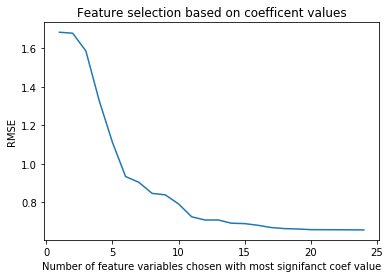

In [139]:
x= np.linspace(1, 24, num=24)
plt.plot(x, score_mean)
plt.ylabel('RMSE')
plt.xlabel('Number of feature variables chosen with most signifanct coef value')
plt.title('Feature selection based on coefficent values')
plt.show()

In [140]:
#choose 6 variables
sfm = SelectFromModel(lm, threshold=-np.inf,max_features=6)
sfm.fit(features_train, windspeed_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        max_features=6, norm_order=1, prefit=False, threshold=-inf)

In [141]:
mask=sfm.get_support()

In [142]:
mask=~mask

In [143]:
x = np.ma.array(features_train.columns, mask=mask)

In [144]:
x.compressed()

array(['Lat', 'Long', 'France', 'Scotland', 'South Africa', 'Turkey'],
      dtype=object)

In [145]:
score_mean

[1.6837507873812356,
 1.6786652097817392,
 1.5866952814213993,
 1.330128819330346,
 1.1134829740040617,
 0.9342748925913392,
 0.904680124708689,
 0.8470176956489921,
 0.8392810410236059,
 0.7923509859532436,
 0.725160968264438,
 0.7087593942969399,
 0.7087593942969399,
 0.6920975582090942,
 0.6899912063346066,
 0.68120471976824,
 0.669576195921139,
 0.6640395616837096,
 0.6620168269430595,
 0.6586813124785103,
 0.6583312229747134,
 0.6580594739517064,
 0.6576161014208635,
 0.657242093833465]

In [146]:
#final test error
lm.fit(sfm.transform(features_train),windspeed_train)
y_predict=lm.predict(sfm.transform(features_test))
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

mse error on test set is -0.9604939580098425.


In [223]:
#polynomial regression we should drop the country data here because their interactions or squared are sort of meaningless to interpret

#import functions needed to set up the dataset
from prepare_data import create_testdata
from preprocessing import preprocessing

#import functions specific to this model
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

#create datasets
df=preprocessing()
features_train,windspeed_train,features_test,windspeed_test=create_testdata(df,'50')
#seperate out the one-hot encoding variables before standardization 
df1 = features_train.iloc[:, :17]
df2 = features_train.iloc[:, 17:]
df3 = features_test.iloc[:, :17]
df4 = features_test.iloc[:, 17:]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
dftrain=scaler.transform(df1)
dftest=scaler.transform(df3)

df1=pd.DataFrame(data=dftrain,index=df1.index.values,columns=df1.columns.values)
df3=pd.DataFrame(data=dftest,index=df3.index.values,columns=df3.columns.values)

features_train=pd.concat([df1,df2], axis=1)
features_test=pd.concat([df3,df4], axis=1)

kfold=10 #default 10-fold cross validation

#hard to impute by country mean so compromise is to have an overall mean strategy

poly = PolynomialFeatures(degree=2)
lm = linear_model.LinearRegression()
pipeline=make_pipeline(poly,lm)

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

cv = KFold(n_splits=kfold, shuffle=True, random_state=1)

# Nested CV with parameter optimization
nested_score = cross_val_score(pipeline, features_train, windspeed_train, scoring='neg_mean_squared_error',cv=cv)


#estimated training error
print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))

pipeline.fit(features_train,windspeed_train)

#regr=pipeline.named_steps['lm']

#now predict the windspeed for test set and output final error (mse)
windspeed_predict=pipeline.predict(features_test)
final_error=-np.sum(np.square(windspeed_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

#feature importance 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(pipeline, random_state=1).fit(features_test, windspeed_test)
explaination=eli5.explain_weights_df(perm, feature_names = features_test.columns.tolist(),top=10)
print(explaination)




Model is estimated to have generalisation error of -0.36441883476672643 with standard deviation 0.027166832110049912.
mse error on test set is -0.41239258857531497.
                                   feature       weight         std
0                                     Long  1670.145080   55.033608
1                                    India  1125.142304   19.768823
2                                      Lat   470.319357  167.224175
3                                   France   322.038676    8.032711
4                             South Africa   302.277122    4.627868
5                                 Thailand   149.351885  115.855909
6                                 Scotland   100.079064    4.701519
7                                    Italy    98.811492   18.442465
8                                   Turkey    53.970482    7.327834
9  Distance to the closest Shrubland (kms)    33.295172   22.169734


In [224]:
np.vstack((y_predict, windspeed_test)).T

array([[6.16771019, 5.33571   ],
       [6.14252328, 5.86488   ],
       [6.16891935, 5.56632   ],
       ...,
       [7.19058572, 6.17926   ],
       [7.22703248, 8.17212   ],
       [7.32672451, 7.70369   ]])

In [225]:
regr=pipeline.named_steps['linearregression']

In [226]:
polyfeature=pipeline.named_steps['polynomialfeatures']

In [227]:
regr.coef_.shape

(351,)

In [228]:
names=polyfeature.get_feature_names()

In [229]:
coef=np.vstack((names, abs(regr.coef_))).T

In [231]:
features_train.columns

Index(['Distance to the closest Airport (kms)',
       'Distance to the closest Builtup (kms)',
       'Distance to the closest roads (kms)',
       'Distance to the closest Agricultural area (kms)',
       'Distance to the closest Barren area (kms)',
       'Distance to the closest Settlement (kms)',
       'Distance to the closest Shrubland (kms)',
       'Distance to the closest Vegetation (kms)',
       'Distance to the closest Water (kms)',
       'Distance to the closest Wetland (kms)',
       'Distance to the closest Forest (kms)',
       'Distance to the closest Grassland (kms)',
       'Distance to the closest Substation (kms)',
       'Elevation of Turbines (meters)', 'Slope', 'Lat', 'Long', 'France',
       'India', 'Italy', 'Portugal', 'Scotland', 'South Africa', 'Thailand',
       'Turkey'],
      dtype='object')

In [230]:
sorted(coef,key=lambda x: float(x[1]),reverse=True)

[array(['x15 x23', '292.2660400608965'], dtype='<U32'),
 array(['x16 x23', '140.91648243032932'], dtype='<U32'),
 array(['x6 x23', '99.68406043915355'], dtype='<U32'),
 array(['x16 x17', '49.62402537676454'], dtype='<U32'),
 array(['x16 x21', '49.004560747667675'], dtype='<U32'),
 array(['x15 x18', '44.58476905431587'], dtype='<U32'),
 array(['x15', '43.00684249784562'], dtype='<U32'),
 array(['x15 x24', '41.82681430407353'], dtype='<U32'),
 array(['x15 x19', '39.80361847093943'], dtype='<U32'),
 array(['x16 x19', '35.87948189630601'], dtype='<U32'),
 array(['x15 x17', '33.15844651395808'], dtype='<U32'),
 array(['x15 x21', '31.89223344691059'], dtype='<U32'),
 array(['x15 x20', '31.41746774439681'], dtype='<U32'),
 array(['x23', '27.166255524152728'], dtype='<U32'),
 array(['x23^2', '27.166255524130182'], dtype='<U32'),
 array(['x15 x22', '26.575848028418513'], dtype='<U32'),
 array(['x16 x18', '25.6043240677032'], dtype='<U32'),
 array(['x21^2', '23.574896930921412'], dtype='<U32'),


In [232]:
from sklearn.pipeline import Pipeline

class PipelineModelselect(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineModelselect, self).fit(X, y, **fit_params)
        self.coef_ = self.steps[-1][-1].coef_
        return self

In [233]:
pipe = PipelineModelselect(
    [
        ('poly', PolynomialFeatures(degree=2)),
        ("lm", linear_model.LinearRegression())
    ]
)

In [234]:
# Nested CV with parameter optimization
nested_score = cross_val_score(pipe, features_train, windspeed_train, scoring='neg_mean_squared_error',cv=cv)


#estimated training error
print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))

Model is estimated to have generalisation error of -0.36441883476672643 with standard deviation 0.027166832110049912.


In [235]:
score_mean=[]
X=poly.fit_transform(features_train)
for i in range(350):
    from sklearn.feature_selection import SelectFromModel
    sfm = SelectFromModel(lm, threshold=-np.inf,max_features=i+1)
    sfm.fit(X, windspeed_train)
    #manual grid search with differnt threshod
    #use cross validation to find out error
    nested_score = cross_val_score(lm,sfm.transform(X), windspeed_train, scoring='neg_mean_squared_error',cv=cv)
    print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))
    score_mean.append(-nested_score.mean())

Model is estimated to have generalisation error of -1.6835124308259766 with standard deviation 0.06288164358571731.
Model is estimated to have generalisation error of -1.6830782039552248 with standard deviation 0.06312929224070239.
Model is estimated to have generalisation error of -1.682958159369117 with standard deviation 0.0630768682369002.
Model is estimated to have generalisation error of -1.6827833098924618 with standard deviation 0.06261488557812203.
Model is estimated to have generalisation error of -1.6771474521588428 with standard deviation 0.06379350572335195.
Model is estimated to have generalisation error of -1.26448217007384 with standard deviation 0.0599935220562666.
Model is estimated to have generalisation error of -1.2643969942425497 with standard deviation 0.060223568969511365.
Model is estimated to have generalisation error of -1.036461398153016 with standard deviation 0.035064589016771536.
Model is estimated to have generalisation error of -0.9419061775246611 with 

Model is estimated to have generalisation error of -0.6165719226403695 with standard deviation 0.030175954260337808.
Model is estimated to have generalisation error of -0.6165932587923983 with standard deviation 0.03015335261422906.
Model is estimated to have generalisation error of -0.6163749368591308 with standard deviation 0.030057967386817323.
Model is estimated to have generalisation error of -0.6151761404902778 with standard deviation 0.03073814807540051.
Model is estimated to have generalisation error of -0.6151898199702505 with standard deviation 0.030747371178428223.
Model is estimated to have generalisation error of -0.6151899352235061 with standard deviation 0.030745515361642824.
Model is estimated to have generalisation error of -0.6151891647558856 with standard deviation 0.030745167093948363.
Model is estimated to have generalisation error of -0.6146800962342375 with standard deviation 0.030686589729193085.
Model is estimated to have generalisation error of -0.612919824163

Model is estimated to have generalisation error of -0.5044278543049265 with standard deviation 0.026833272171848676.
Model is estimated to have generalisation error of -0.504385314258245 with standard deviation 0.026977042481026548.
Model is estimated to have generalisation error of -0.5005613403806238 with standard deviation 0.027203277518968526.
Model is estimated to have generalisation error of -0.5003230438061865 with standard deviation 0.027223318129574257.
Model is estimated to have generalisation error of -0.5000104810568237 with standard deviation 0.02727568641595006.
Model is estimated to have generalisation error of -0.4858285753606152 with standard deviation 0.027167499063392747.
Model is estimated to have generalisation error of -0.48437969189570734 with standard deviation 0.026099358385615452.
Model is estimated to have generalisation error of -0.4843851673796049 with standard deviation 0.026136398970330727.
Model is estimated to have generalisation error of -0.48393058029

Model is estimated to have generalisation error of -0.4076265014441617 with standard deviation 0.027889120090708503.
Model is estimated to have generalisation error of -0.40785495873758276 with standard deviation 0.0298806967628915.
Model is estimated to have generalisation error of -0.40776098197180344 with standard deviation 0.030171153497597174.
Model is estimated to have generalisation error of -0.4076644400952916 with standard deviation 0.03011678624918388.
Model is estimated to have generalisation error of -0.40730089828638294 with standard deviation 0.030153436806874042.
Model is estimated to have generalisation error of -0.40543760504564863 with standard deviation 0.030578852329563977.
Model is estimated to have generalisation error of -0.40543752828060436 with standard deviation 0.030578489773702353.
Model is estimated to have generalisation error of -0.4054369829215772 with standard deviation 0.03057817709056341.
Model is estimated to have generalisation error of -0.402874646

Model is estimated to have generalisation error of -0.36472777280446145 with standard deviation 0.02770696665713521.
Model is estimated to have generalisation error of -0.3647501883227551 with standard deviation 0.027632140209064304.
Model is estimated to have generalisation error of -0.3647679753724755 with standard deviation 0.027618386585576027.
Model is estimated to have generalisation error of -0.36439448558368115 with standard deviation 0.027611574964889987.
Model is estimated to have generalisation error of -0.36436792679568253 with standard deviation 0.027609572216680832.
Model is estimated to have generalisation error of -0.3641759397651923 with standard deviation 0.02754410217664581.
Model is estimated to have generalisation error of -0.3640239345901347 with standard deviation 0.02742359045935572.
Model is estimated to have generalisation error of -0.36392406597173016 with standard deviation 0.02733310768443343.
Model is estimated to have generalisation error of -0.3639682024

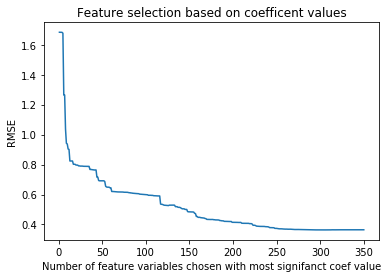

In [236]:
x= np.linspace(1, 350, num=350)
plt.plot(x, score_mean)
plt.ylabel('RMSE')
plt.xlabel('Number of feature variables chosen with most signifanct coef value')
plt.title('Feature selection based on coefficent values')
plt.show()

In [237]:
X=poly.fit_transform(features_train)

In [243]:
score_mean[149]

0.4843851673796049

In [240]:
#throw away half of the features
sfm = SelectFromModel(lm, threshold=-np.inf,max_features=150)
sfm.fit(X, windspeed_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        max_features=150, norm_order=1, prefit=False, threshold=-inf)

In [241]:
mask=sfm.get_support()
mask=~mask
x = np.ma.array(names, mask=mask)
x.compressed()

array(['x1', 'x2', 'x4', ..., 'x22^2', 'x23^2', 'x24^2'], dtype='<U7')

In [245]:
np.set_printoptions(threshold=sys.maxsize)
x.compressed()

array(['x1', 'x2', 'x4', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
       'x15', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x0 x15', 'x0 x17', 'x0 x21', 'x0 x22', 'x0 x23', 'x1 x17',
       'x1 x18', 'x1 x19', 'x1 x20', 'x1 x21', 'x1 x22', 'x1 x23',
       'x1 x24', 'x2 x15', 'x2 x16', 'x2 x17', 'x2 x18', 'x2 x19',
       'x2 x20', 'x2 x21', 'x2 x22', 'x2 x23', 'x3 x15', 'x3 x16',
       'x3 x17', 'x3 x19', 'x3 x22', 'x4 x16', 'x4 x17', 'x4 x18',
       'x4 x19', 'x4 x20', 'x4 x21', 'x4 x22', 'x4 x23', 'x4 x24',
       'x5 x16', 'x5 x17', 'x5 x19', 'x5 x20', 'x5 x21', 'x5 x22',
       'x5 x23', 'x6 x15', 'x6 x17', 'x6 x18', 'x6 x19', 'x6 x20',
       'x6 x21', 'x6 x22', 'x6 x23', 'x6 x24', 'x7 x15', 'x7 x16',
       'x7 x17', 'x7 x18', 'x7 x19', 'x7 x20', 'x7 x22', 'x7 x23',
       'x8 x16', 'x8 x17', 'x8 x18', 'x8 x19', 'x8 x20', 'x8 x21',
       'x8 x22', 'x8 x23', 'x9 x15', 'x9 x18', 'x9 x19', 'x9 x21',
       'x9 x22', 'x9 x23', 'x9 x24', 'x10 x16', 'x10 x1

In [242]:
#final test error
lm.fit(sfm.transform(X),windspeed_train)
X_test=poly.fit_transform(features_test)
y_predict=lm.predict(sfm.transform(X_test))
final_error=-np.sum(np.square(y_predict-windspeed_test))/len(windspeed_test)
print('mse error on test set is {}.'.format(final_error))

mse error on test set is -0.527864234361694.


In [246]:
sub_columns=['Lat', 'Long', 'France', 'Scotland', 'South Africa', 'Turkey']

In [247]:
subset_train=features_train[sub_columns]
subset_test=features_test[sub_columns]

In [252]:
poly = PolynomialFeatures(degree=6)
lm = linear_model.LinearRegression()
pipeline=make_pipeline(poly,lm)

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

cv = KFold(n_splits=kfold, shuffle=True, random_state=1)

# Nested CV with parameter optimization
nested_score = cross_val_score(pipeline, subset_train, windspeed_train, scoring='neg_mean_squared_error',cv=cv)


#estimated training error
print("Model is estimated to have generalisation error of {} with standard deviation {}.".format(nested_score.mean(),nested_score.std()))

Model is estimated to have generalisation error of -0.586995470452379 with standard deviation 0.025318338663243328.
